<a href="https://colab.research.google.com/github/Rolkarolka/COVID_zainteresowanie/blob/master/korona_zainteresowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pytrends

In [0]:
pip install translate

# Zainteresowanie społeczności tematem koronawirusa, a wzorst liczby zachorowań w kraju



Zaimportowanie bibliotek

In [0]:
from translate import Translator
from datetime import date, timedelta
import os
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
import pandas as pd

pytrend = TrendReq()

stworzenie słownika słów o koronawirusie dla języków aby poprawić skuteczność wyszukiwania

In [0]:
def translate_word(word, language):
  translator= Translator(to_lang=language, from_lang="en")
  translation = translator.translate(word)
  return translation

Załadowanie danych z "Google Trends"

In [0]:
def data_payload(key_list, begin_date, end_date, location):
    time_frame = begin_date + " " + end_date
    pytrend.build_payload(kw_list=key_list, timeframe=time_frame, geo=location)
    df = pytrend.interest_over_time()
    df.drop(['isPartial'], axis=1, inplace=True)
    return df

Tworzenie wykresu z pomocą biblioteki matplotlib

In [0]:
def create_plot(df, df_title):
    df.plot(y=[i for i in df.columns],figsize=(10, 5), title=df_title)
    plt.show()

Stworzenie tabeli liczącej średnią z kolumn podanych danych

In [0]:
def average_df(df, country, day_0):
    from_day_0 = df.shape[0]
    num_col = len(df.columns)
    dates = pd.date_range(day_0, periods=from_day_0)
    average = []
    for i in range(from_day_0):
        value_sum = 0
        for j in range(num_col):
            value = df.iloc[i][df.columns[j]]
            value_sum += value
        average.append(value_sum / num_col *2)
    df_avg = pd.DataFrame({f"{country}": average}, index=dates)
    return df_avg

In [0]:
eng_words = ["Coronavirus", "Corona", "Covid"]
countries_dict = {"PL":"Poland", "IT":"Italy", "FR":"France", "DE":"Germany"}
countries = list(countries_dict.keys())


Przetłumaczenie słów kluczowych na podane języki

In [0]:
def create_key_in_lang(countries, eng_words):
  key_in_lang = {}
  for lang in countries:
    translated = []
    lang = lang.lower()
    for word in eng_words:
      lang_word = translate_word(word, lang)
      translated.append(lang_word.split()[0])
    key_in_lang[lang.upper()] = translated
  key_in_lang['GB'] = eng_words
  return key_in_lang

In [0]:
key_in_lang = create_key_in_lang(countries, eng_words)

In [0]:
today = date.today()
day_0 = date(2020, 1, 22)
countries.append("CN")
countries

['PL', 'IT', 'FR', 'DE', 'CN']

Stworzenie wykresu zainteresowania koronawirusem, w państwach: Polska, Włochy, Francja, Niemcy, Chiny

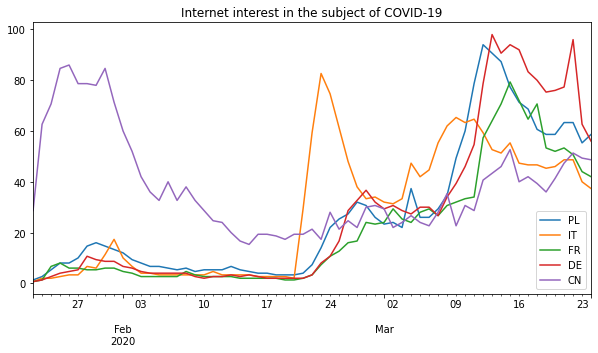

In [0]:
for key in range(len(countries)):
    if key == 0:
      if key in key_in_lang.keys():
        df = data_payload(key_in_lang[countries[key]], f"{day_0}", f"{today}", countries[key].upper())
      else:
        df = data_payload(key_in_lang["GB"], f"{day_0}", f"{today}", countries[key].upper())
      df_avg = average_df(df, countries[key], day_0)
    else:
      if key in key_in_lang.keys():
        another_df = data_payload(key_in_lang[countries[key]], f"{day_0}", f"{today}", countries[key].upper())
      else:
        another_df = data_payload(key_in_lang["GB"], f"{day_0}", f"{today}", countries[key].upper())
      df_avg_o = average_df(another_df, countries[key], day_0)
      df_avg[countries[key]] = df_avg_o[countries[key]]
      
create_plot(df_avg, "Internet interest in the subject of COVID-19")


In [0]:
df_avg.tail(10)

,PL,IT,FR,DE,CN
2020-03-15,77.333333,55.333333,79.333333,94.000000,52.666667
2020-03-16,71.333333,47.333333,72.000000,92.000000,40.000000
2020-03-17,68.666667,46.666667,64.666667,83.333333,42.000000
2020-03-18,60.666667,46.666667,70.666667,80.000000,39.333333
2020-03-19,58.666667,45.333333,53.333333,75.333333,36.000000
2020-03-20,58.666667,46.000000,52.000000,76.000000,41.333333
2020-03-21,63.333333,48.666667,53.333333,77.333333,47.333333
2020-03-22,63.333333,48.666667,50.666667,96.000000,51.333333
2020-03-23,55.333333,40.000000,44.000000,62.666667,49.333333
2020-03-24,58.666667,37.333333,42.000000,56.000000,48.666667


In [0]:
countries.remove("CN")
countries.remove("FR")

Wczytanie danych o potwierdzonych przypadkach zarażenia COVID-19

In [0]:
confirmed_cases_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [0]:
def cleandata(df_raw):
    df_cleaned=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'],value_name='Cases',var_name='Date')
    df_cleaned=df_cleaned.set_index(['Country/Region','Province/State','Date'])
    return df_cleaned 

# Clean all datasets
confirmed_cases=cleandata(confirmed_cases_raw)

In [0]:
confirmed_cases

Lat  ...  Cases
Country/Region        Province/State        Date                ...       
Afghanistan           NaN                   1/22/20  33.000000  ...      0
Albania               NaN                   1/22/20  41.153300  ...      0
Algeria               NaN                   1/22/20  28.033900  ...      0
Andorra               NaN                   1/22/20  42.506300  ...      0
Angola                NaN                   1/22/20 -11.202700  ...      0
...                                                        ...  ...    ...
Saint Kitts and Nevis NaN                   3/27/20  17.357822  ...      2
Canada                Northwest Territories 3/27/20  64.825500  ...      1
                      Yukon                 3/27/20  64.282300  ...      3
Kosovo                NaN                   3/27/20  42.602636  ...     86
Burma                 NaN                   3/27/20  21.916200  ...      8

[16434 rows x 3 columns]

Funkcja obliczająca przyrost zachorowań

In [0]:
def increase_df(case_df):
  from_day_0 = case_df.shape[0]
  dates = pd.date_range(day_0, periods=from_day_0)
  num_cases = list(case_df["Cases"])
  
  increases = []
  for i in range(len(dates)):
      if i == 0:
        diff = 0
      else:
        diff = num_cases[i] - num_cases[i-1]
      if num_cases[i] != 0:
        increase = diff/num_cases[i] * 100
      else:
        increase = 0
      increases.append(increase)
  df_increase = pd.DataFrame({"Increase": increases}, index=dates)
  return df_increase


Rozpatrzenie zależności między zainteresowaniem, przyrostem a liczbą potwierdzonych przypadków

In [0]:
country =confirmed_cases.loc["Poland"]
country = country.drop(country.columns[[0,1]], axis='columns')
increase_country = increase_df(country)
confirmed = list(country["Cases"])
checked_country = "Poland"
from_day_0 = country.shape[0]
dates = pd.date_range(day_0, periods=from_day_0)
df_num_confirmed = pd.DataFrame({f"Confirmed in {checked_country}": confirmed}, index=dates)

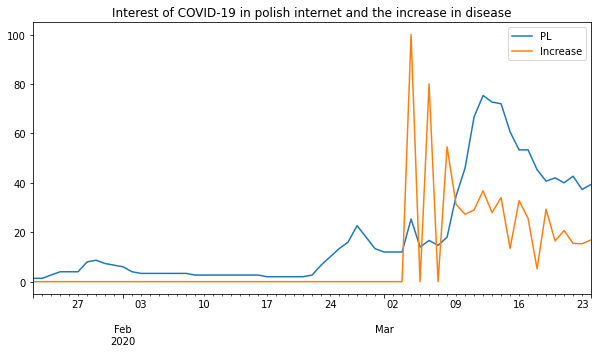

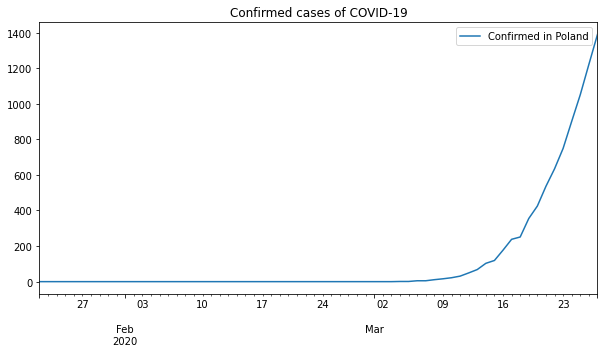

In [0]:
df = data_payload(key_in_lang["PL"], f"{day_0}", f"{today}", "PL")
df_avg = average_df(df, "PL", day_0)
country_interested = df_avg.join(increase_country)
create_plot(country_interested, "Interest of COVID-19 in polish internet and the increase in disease")
create_plot(df_num_confirmed, "Confirmed cases of COVID-19")

In [0]:
def make_plots_of_increas_ccases_interest(country):
  if country in key_in_lang.keys():
    df = data_payload(key_in_lang[country], f"{day_0}", f"{today}", country.upper())
  else:
    df = data_payload(key_in_lang["GB"], f"{day_0}", f"{today}", country.upper())
  df_avg = average_df(df, country, day_0)
  country_df = confirmed_cases.loc[countries_dict[country]]
  country_df = country_df.drop(country_df.columns[[0,1]], axis='columns')
  increase_country = increase_df(country_df)
  confirmed = list(country_df["Cases"])
  from_day_0 = country_df.shape[0]
  dates = pd.date_range(day_0, periods=from_day_0)
  df_num_confirmed = pd.DataFrame({f"Confirmed in {countries_dict[country]}": confirmed}, index=dates)
  country_interested = df_avg.join(increase_country)
  create_plot(country_interested, f"Interest of COVID-19 in {countries_dict[country]} internet and the increase in disease")
  create_plot(df_num_confirmed, f"Confirmed cases in {countries_dict[country]}")

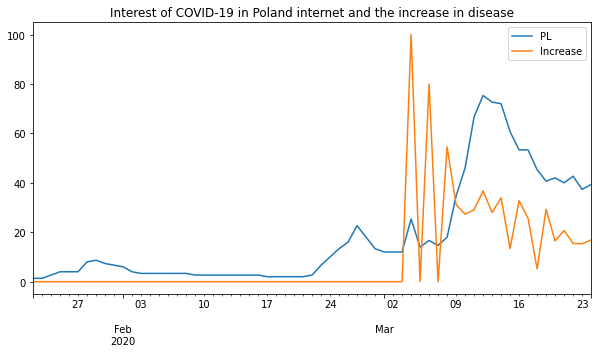

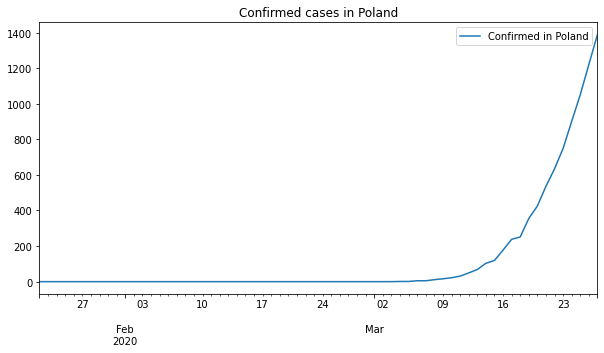

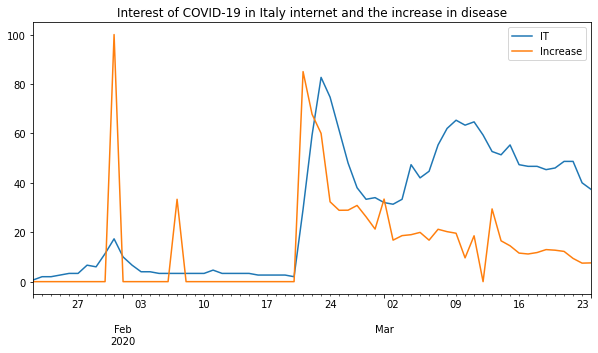

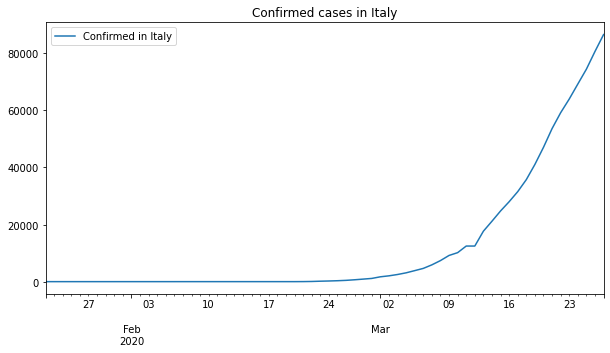

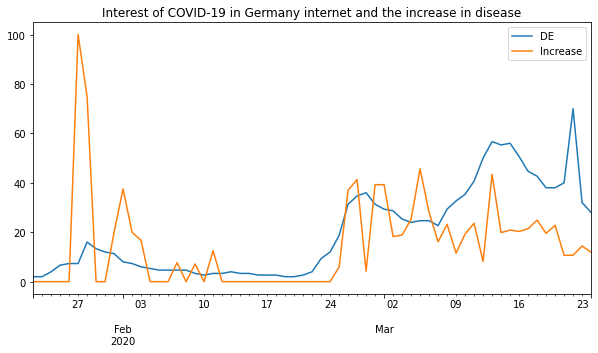

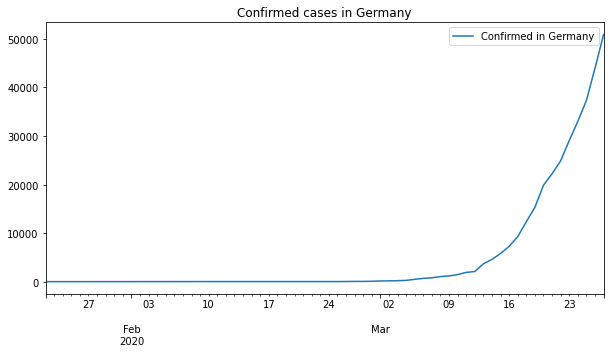

In [0]:
for country in countries:
  make_plots_of_increas_ccases_interest(country)